# ANALYSIS: ADULT CENSUS INCOME (US)
DATASET SOURCE: https://www.kaggle.com/datasets/priyamchoksi/adult-census-income-dataset

<img src="https://storage.googleapis.com/kaggle-datasets-images/5350160/8899335/df341b129b7887153426614799f38f68/dataset-cover.png?t=2024-07-07-17-03-28" alt="Dataset Cover Image" width="500">

## Introduction

In modern history, formal education has been widely regarded as the key to achieving wealth and financial success. However, the landscape of education and income has been transformed since the turn of the century, primarily due to the mass adoption of the internet. This unprecedented access to knowledge and educational resources prompts us to re-evaluate traditional beliefs about the relationship between education and income.

This data analysis report aims to address several critical questions in this context:

- How have the internet and our unprecedented access to knowledge and education affected income?
- How does formal education correlate with income?
- Do those with higher incomes work more or fewer hours?
- Is there still a large difference in income between men and women?
- Does marital status have any effect on income?

By analysing relevant data, we seek to uncover insights into how these factors influence income distribution and economic opportunities in the digital age. This analysis will provide a clearer understanding of the evolving dynamics between education, work, gender, and marital status, offering valuable perspectives for policymakers, educators, and individuals navigating the modern economy.

---

## Import & Data Inspection

We start our analysis by importing the necessary libraries and dataset followed by some preliminary inspection of our data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Census.csv', sep=',')

In [2]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


---

## Data Handling and Cleanup

We now know the shape of our data - how many rows and columns it has, as well as the names of the columns.

While we can see there are no 'null' values, we can see from the head that we do have some values that could interrupt our analysis - namely the '?' values.

Let's update our column names so they're capitalised and remove the erroneous values.

In [5]:
df = df.rename(columns=lambda x: x.capitalize())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education.num   32561 non-null  int64 
 5   Marital.status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital.gain    32561 non-null  int64 
 11  Capital.loss    32561 non-null  int64 
 12  Hours.per.week  32561 non-null  int64 
 13  Native.country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Editing column names
df = df.rename(columns={'Education.num': 'Education.Num',
                        'Marital.status': 'Marital.Status',
                        'Capital.gain': 'Capital.Gain',
                        'Capital.loss': 'Capital.Loss',
                        'Hours.per.week': 'Hours.Per.Week',
                        'Native.country': 'Native.Country'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education.Num   32561 non-null  int64 
 5   Marital.Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital.Gain    32561 non-null  int64 
 11  Capital.Loss    32561 non-null  int64 
 12  Hours.Per.Week  32561 non-null  int64 
 13  Native.Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
# Removing null values
df = df.replace('?', pd.NA)
df = df.dropna()
df.shape

(30162, 15)

---

## Data Visualisation

With our cleanup now complete, we now have all of our column names looking uniform.

We've also removed all of the rows with erroneous entries, leaving us with over 30,162 rows - plenty for our analysis!

Let's start understanding our data effectively with some visualisations.

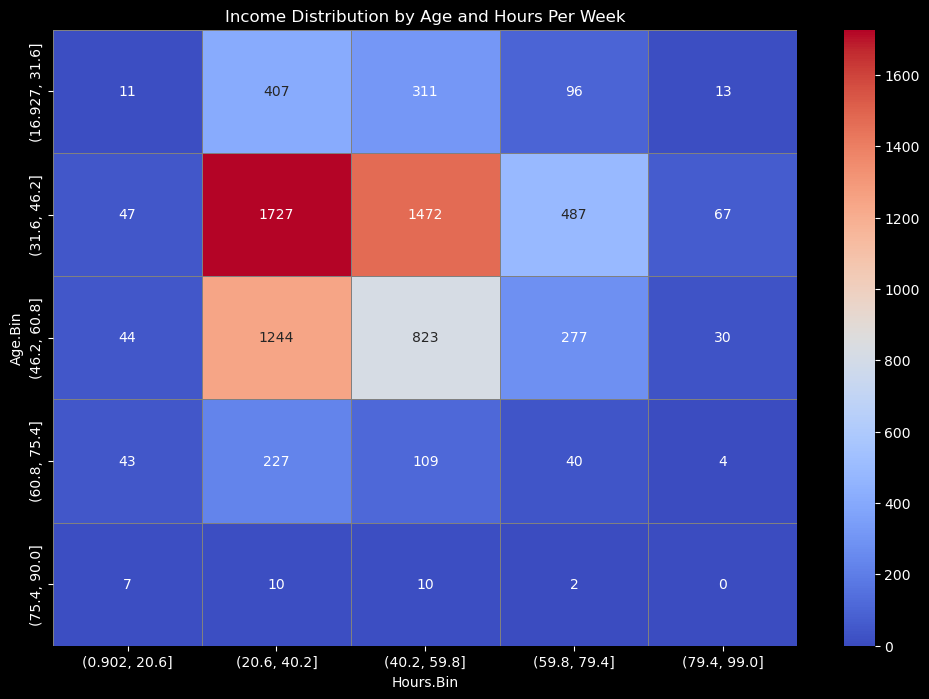

In [12]:
# Defining bins
df['Age.Bin'] = pd.cut(df['Age'], bins=5)
df['Hours.Bin'] = pd.cut(df['Hours.Per.Week'], bins=5)

# Pivot table: income by age and hours bins
heatmap_data = df.pivot_table(index='Age.Bin', columns='Hours.Bin', values='Income', aggfunc=lambda x: (x == '>50K').sum())

# Heatmap
plt.style.use('dark_background')
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5, linecolor='gray')
plt.title('Income Distribution by Age and Hours Per Week')
plt.show()

#### Age and Hours Per Week
As we can see from the above heatmap, the majority of overall income is earned by those aged between 31.6 and 46.2, who appear to spend 20.6 - 40.2 hours at work.

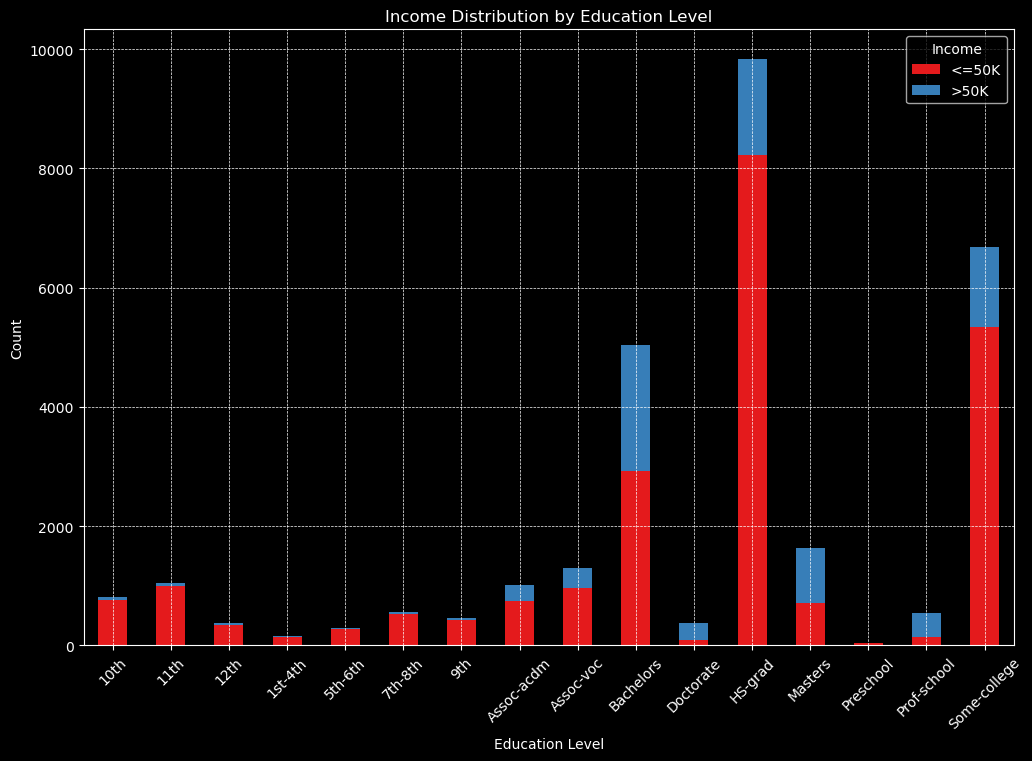

In [28]:
# Calculating counts
education_income_counts = df.groupby(['Education', 'Income']).size().unstack().fillna(0)

# Stacked bar chart
education_income_counts.plot(kind='bar', stacked=True, color=colors, figsize=(12, 8))
plt.style.use('dark_background')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Income Distribution by Education Level')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#### Education Level
The barplot above shows us the clear difference in education for those with an income greater than 50k vs those with an income equal or below 50k. As we can see - those who didn't graduate from High School make up the large majority of income for the <=50K bracket - an expected result. However, it's surprising to see just how many High School graduates with no Further or Higher Education earn >50K.

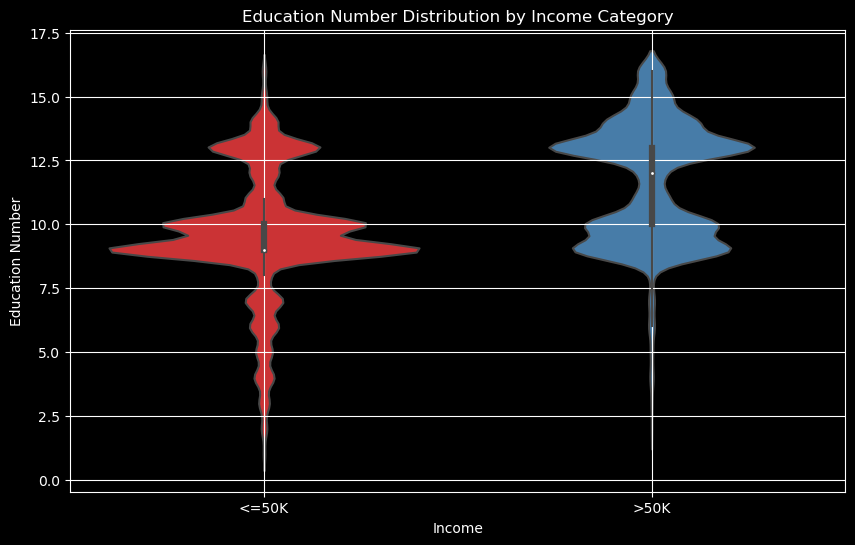

In [26]:
# Converting Income to numeric
df['Income.Numeric'] = df['Income'].apply(lambda x: 1 if x == '>50K' else 0)

# Violin plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
sns.violinplot(x='Income', y='Education.Num', data=df, palette='Set1')
plt.xlabel('Income')
plt.ylabel('Education Number')
plt.title('Education Number Distribution by Income Category')
plt.grid(True)

plt.show()


This violin plot is a perfect way to really understand the education distribution between the two income brackets we're analysing. We can clearly see those in the higher bracket of >50K averagely have a higher education level than those in the <=50K bracket. While this difference is clearly visible, I had expected a greater disparity between the two income brackets.

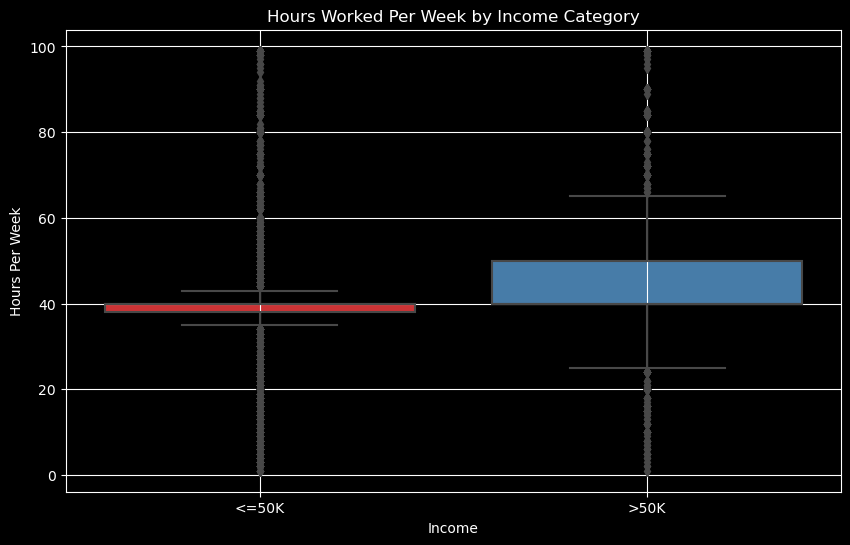

In [13]:
# Hours Worked vs Income

plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Hours.Per.Week', data=df, palette='Set1')
plt.xlabel('Income')
plt.ylabel('Hours Per Week')
plt.title('Hours Worked Per Week by Income Category')
plt.grid(True)
plt.show()


#### Hours Worked Per Week
The higher income bracket may earn more than the <=50K bracket, but they also work more - up to 10 hours more per week, in some cases!

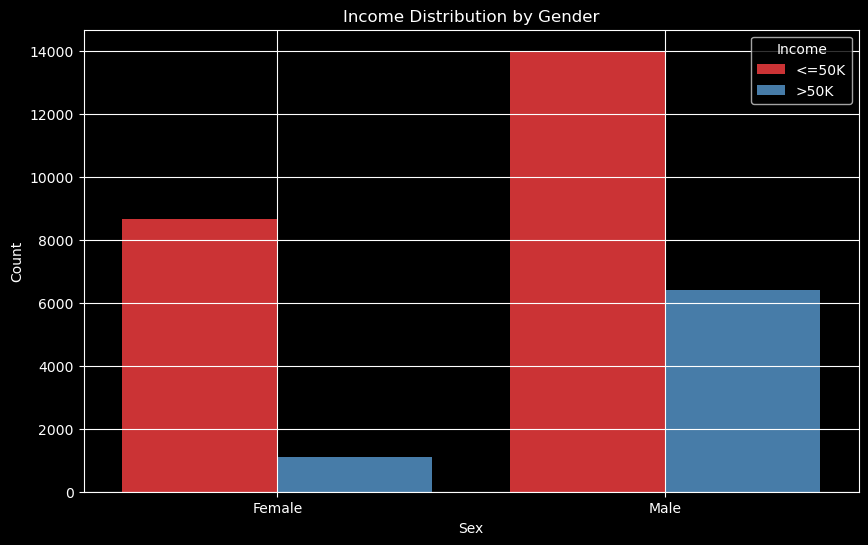

In [18]:
# Income Difference Between Men and Women

plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Income', data=df, palette='Set1')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Income Distribution by Gender')
plt.legend(title='Income')
plt.grid(True)
plt.show()


#### Difference in Genders
The above Income Distribution plot is a great visual to help understand the income distribution between the sexes in our dataset. As we can see, there is a huge disparity on the left with the majority of employed females being in the lower income bracket of <=50K.

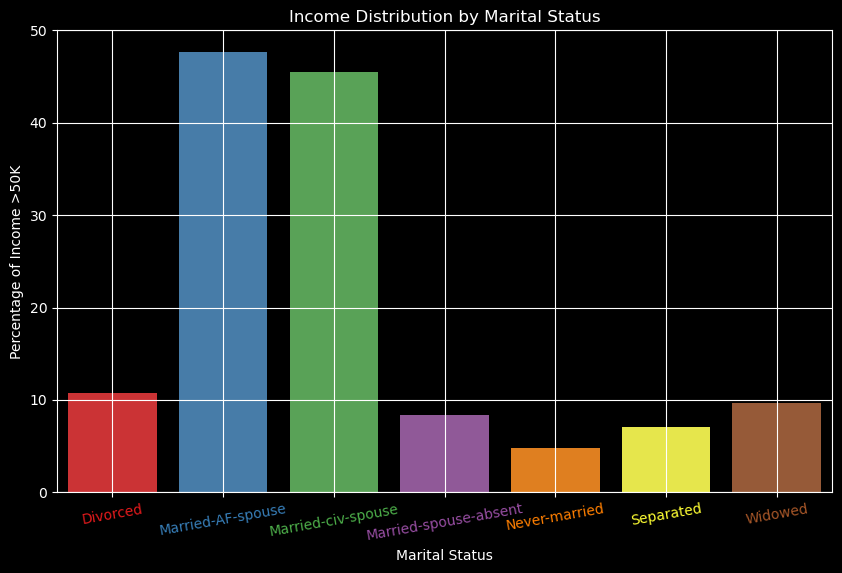

In [27]:
# Effect of Marital Status on Income

# Calculating percentage of income >50K for marital status
marital_income = df.groupby('Marital.Status')['Income'].value_counts(normalize=True).unstack().fillna(0)
marital_income['Percent >50K'] = marital_income['>50K'] / marital_income.sum(axis=1) * 100

# Bar plot
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=marital_income.index, y='Percent >50K', data=marital_income, palette='Set1')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Income >50K')
plt.xticks(rotation=10)
plt.title('Income Distribution by Marital Status')
plt.grid(True)

# Setting label colours to match bars
for label, color in zip(plt.gca().get_xticklabels(), sns.color_palette('Set1', len(marital_income.index))):
    label.set_color(color)

plt.show()


#### Marital Status & Income
I was intrigued to see how marital status may affect income. Before this analysis, it was my assumption that those who are most successful in their careers are less likely to be married. However, the chart above clearly shows the majority of people earning >50K are married.

---

## Summary

- The majority of income is earned by individuals aged between 31.6 and 46.2, who work between 20.6 and 40.2 hours per week.
- A significant number of individuals in the lower income bracket (<=50K) did not graduate from high school.
- High school graduates with no further education unexpectedly constitute a notable portion of those in the higher income bracket (>50K).
- Higher-income individuals generally have higher education levels than those earning <=50K. While this could be anticipated, the disparity is not as large as one may assume.
- Those in the high income bracket tend to work more hours than those in the lower income bracket, up to 10 hours more.
- The income disparity between men and women is still substantial, with the majority of employed females in the <=50K bracket.
- Contrary to my assumption that successful career individuals are less likely to be married, the majority of those in the high income bracket are married.

## Conclusion

Our analysis of the Adult Census Income (US) dataset has been insightful and revealing. We've looked at the relationship between education, income and other socio-economic factors in our modern, internet-driven economy. What have we learned?

- While higher formal education does still correlate with higher income, it appears the internet and access to information have somewhat blurred this traditional pathway, allowing individuals with only a high school education to achieve substantial incomes.
- Higher income earners tend to work more hours, suggesting income is at least in part a function of time invested in work.
- Gender disparities in income remain significant.
- Marital status appears to have a positive correlation with higher income - directly challenging the assumption that career success and marriage are mutually exclusive.

While traditional factors like education and hours spent at work continue to play a signification role in expected income, the digital age has introduced new dynamics. We are living through unprecedented times, with access to knowledge and information easier than ever before in human history. 

Understanding these evolving dynamics is crucial for policymakers, educators, and individuals as we navigate the complexities of our modern economy. By embracing the opportunities presented by the digital age, we can work towards a more equitable and informed society.

Thank you for your attention to this analysis.

<p style="text-align: right; font-style: italic;">David Harrold</p>